In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

## Part I

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. 

1. **Aggregate** these login counts based on **15 minute time intervals**, 
2. and **visualize and describe** the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 
3. Please report/illustrate important features of the demand, such as **daily cycles**. If there are data quality issues, please report them.

In [2]:
# (simulated) timestamps of user logins
logins = pd.read_json('logins.json', dtype = {'login_time':'datetime64[ns]'})
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins['Frequency'] = 1

In [4]:
login_15min = logins.set_index('login_time').groupby(pd.Grouper(freq='15min')).count()

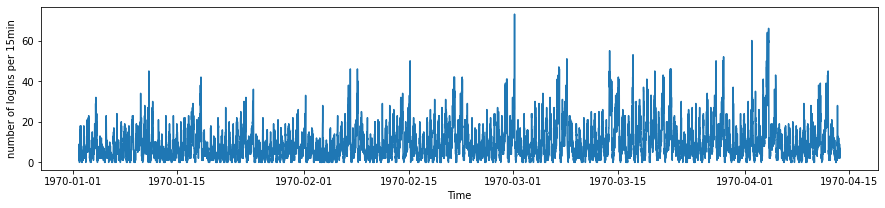

In [5]:
plt.figure(figsize=(15,3))
plt.plot(login_15min.index, login_15min.Frequency)
plt.xlabel('Time')
plt.ylabel('number of logins per 15min')
plt.show()

In [6]:
login_15min = login_15min.reset_index()

In [7]:
login_15min.head()

,login_time,Frequency
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [8]:
# year
login_15min['year'] = login_15min['login_time'].dt.year
# month
login_15min['month'] = login_15min['login_time'].dt.month
# day of month
login_15min['day'] = login_15min['login_time'].dt.day
# day of week
login_15min['week'] = login_15min['login_time'].dt.dayofweek
# hour
login_15min['hour'] = login_15min['login_time'].dt.hour

<AxesSubplot:xlabel='month'>

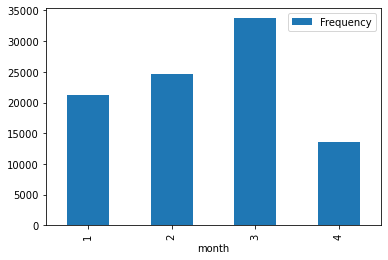

In [9]:
# visualize with month
login_15min[['month', 'Frequency']].groupby('month').sum().plot(kind='bar')

<AxesSubplot:xlabel='day'>

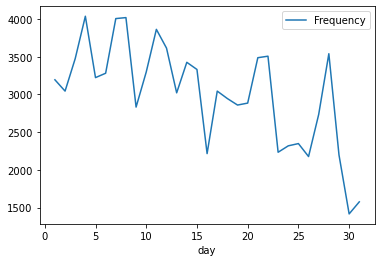

In [10]:
# visualize with day
login_15min[['Frequency', 'day']].groupby('day').sum().plot()

<AxesSubplot:xlabel='week'>

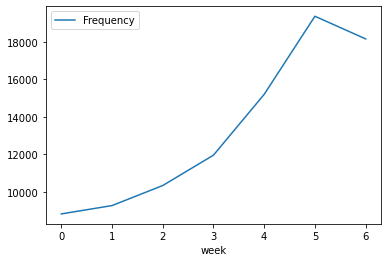

In [11]:
# visualize with week
login_15min[['week', 'Frequency']].groupby('week').sum().plot()

<AxesSubplot:xlabel='hour'>

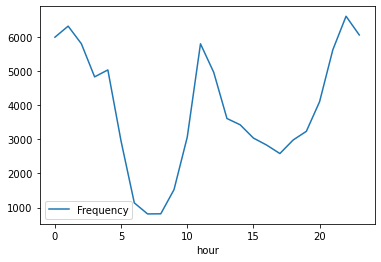

In [12]:
# visualize with hour
login_15min[['Frequency', 'hour']].groupby('hour').sum().plot()

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: 
on **weekdays**, Ultimate Gotham is most active at **night**, and Ultimate Metropolis is most active during the **day**. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Percentage increase of travelers from one city to another.


2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

conduct experiment on alternative week, one as controlled group, one as experimental group. 

b) what statistical test(s) you will conduct to verify the significance of the observation

t-test

c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.
Note: The two citiess of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.

we have the hypothsis controlled == experimental, and alternative as controlled M experimental; if we find p-value smaller than 0.5, we reject the null hypothesis and recommend the exprimental meethods to be implemented in long term to meet the goal.

## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who **signed up for an Ultimate account** in
January 2014. The data was pulled several months later; we consider a user **retained** if they
were “**active” (i.e. took a trip) in the preceding 30 days**.
We would like you to use this data set to help understand what factors are the **best predictors**
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [13]:
ultimate = pd.read_json('ultimate_data_challenge.json', dtype = {'last_trip_date':'datetime64[ns]', 'signup_date':'datetime64[ns]'})


In [14]:
ultimate['active'] = ultimate['trips_in_first_30_days']>0
ultimate['length_of_months'] = (ultimate['last_trip_date']-ultimate['signup_date']).astype('timedelta64[M]')
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,length_of_months
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True,4.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,3.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,True,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True,5.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,True,1.0


In [15]:
# check the rows with missing values
missing_rows = ultimate.isna().any(axis=1)
df_missing_rows = ultimate[~missing_rows]

### EDA

In [16]:
# df info
ultimate.info() 
# missing values in avg_rating_of_driver, phone, avg_rating_by_driver
# drop value for prediction, signup_date, last_trip_date, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  bool  

In [17]:
# object
ultimate_object_colname = ultimate.select_dtypes('object').columns
# numeric
ultimate_float_colname = ultimate.select_dtypes('float').columns
ultimate_int_colname = ultimate.select_dtypes('int').columns
#bool
ultimate_bool_colname = ultimate.select_dtypes('bool').columns

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


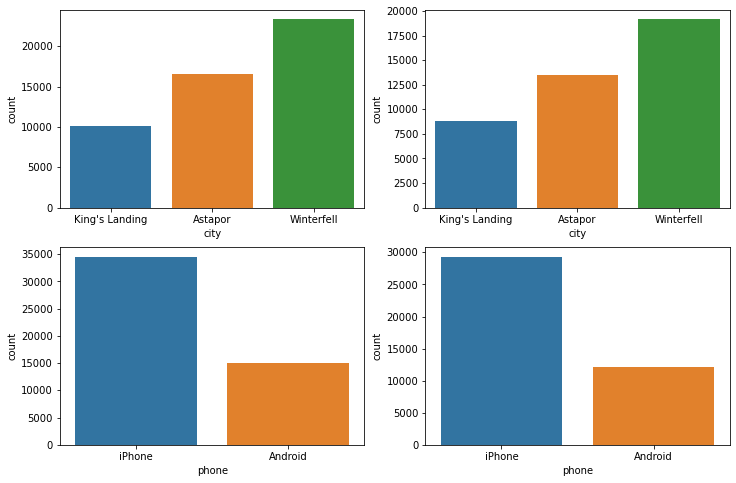

In [18]:
n=1
plt.figure(figsize=(12,8))
for col in ultimate_object_colname:
    plt.subplot(2,2,n);sns.countplot(ultimate[col])
    plt.subplot(2,2,n+1);sns.countplot(df_missing_rows[col])
    n+=2
plt.show()

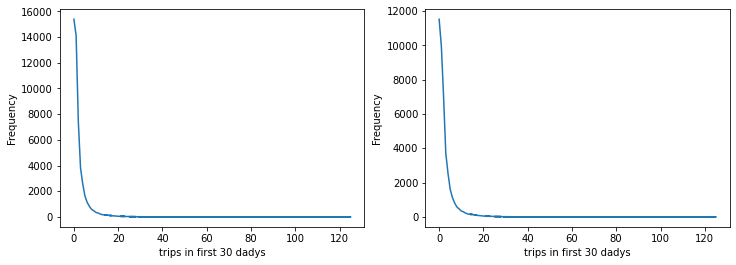

In [19]:
# int
plt.figure(figsize=(12,4))
for col in ultimate_int_colname:
    plt.subplot(1,2,1);ultimate[col].value_counts().plot()
    plt.xlabel('trips in first 30 dadys')
    plt.ylabel('Frequency')
    plt.subplot(1,2,2);df_missing_rows[col].value_counts().plot()
    plt.xlabel('trips in first 30 dadys')
    plt.ylabel('Frequency')

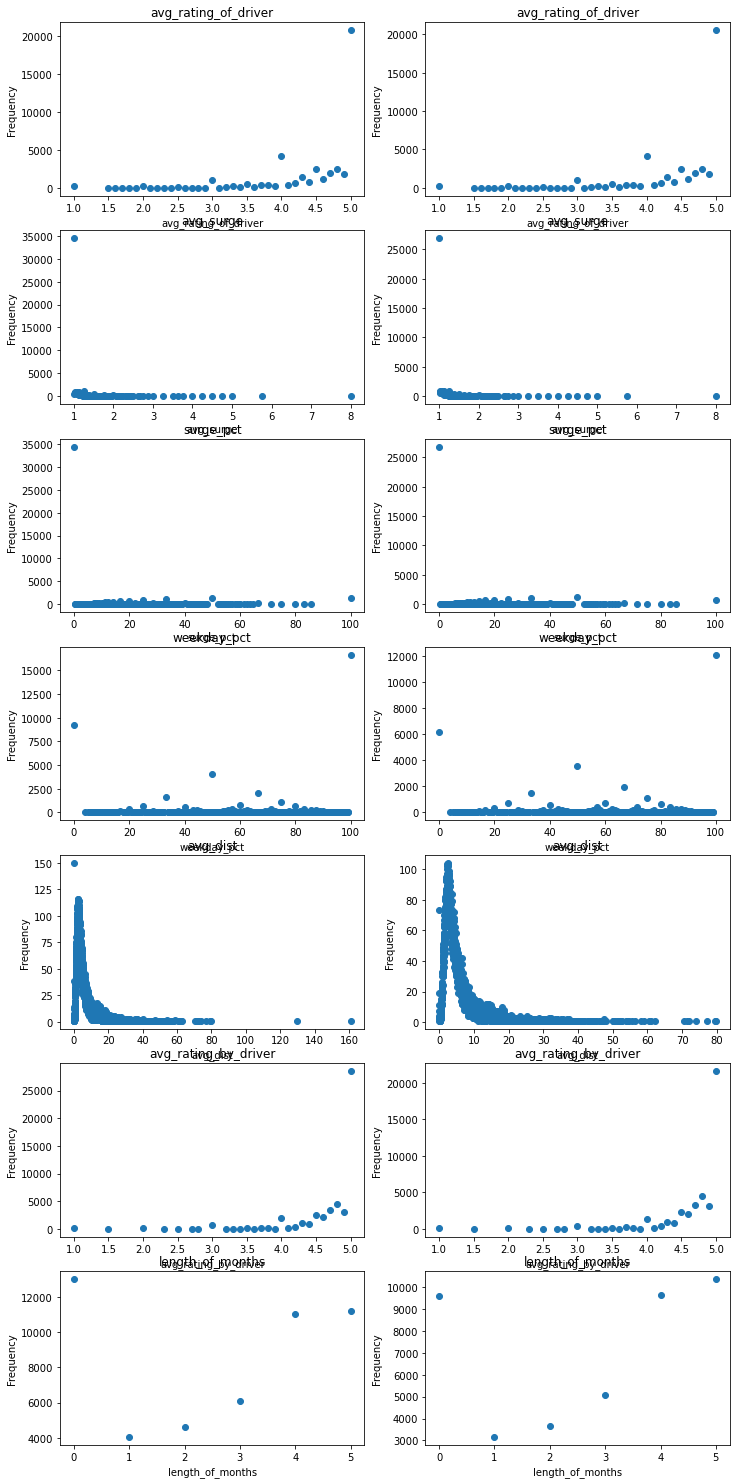

In [20]:
# float
n=1
plt.figure(figsize=(12,30))
for col in ultimate_float_colname:
    col_val_count = ultimate[col].value_counts().reset_index()
    col_val_count_missing = df_missing_rows[col].value_counts().reset_index()
    
    plt.subplot(8,2,n); plt.title(col)
    plt.scatter(col_val_count['index'], col_val_count[col])
    plt.xlabel(col); plt.ylabel('Frequency')

    plt.subplot(8,2,n+1); plt.title(col)
    plt.scatter(col_val_count_missing['index'], col_val_count_missing[col])
    plt.xlabel(col); plt.ylabel('Frequency')
    n+=2
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


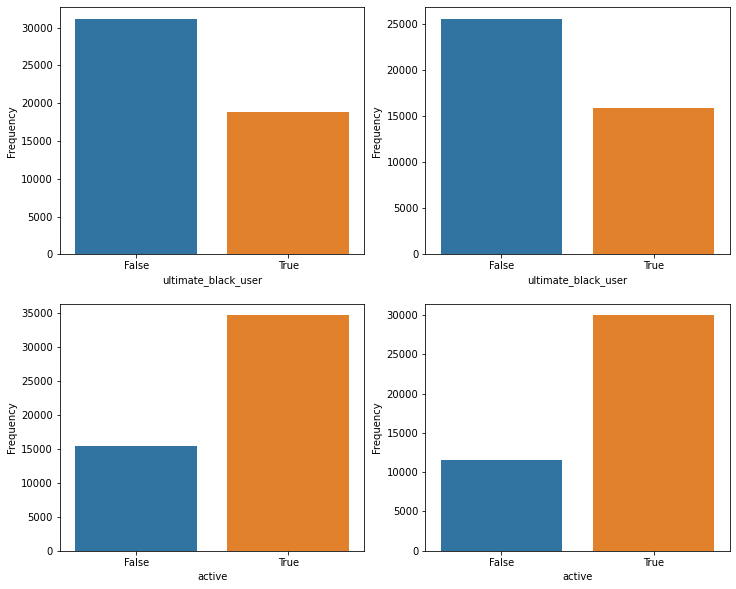

Percentage Retained 69.22


In [21]:
# bool
n=1
plt.figure(figsize=(12,10))
for col in ultimate_bool_colname:
    plt.subplot(2,2,n)
    sns.countplot(ultimate[col])
    plt.xlabel(col); plt.ylabel('Frequency')
    
    plt.subplot(2,2,n+1)
    sns.countplot(df_missing_rows[col])
    plt.xlabel(col); plt.ylabel('Frequency')
    
    n+=2
plt.show()
print('Percentage Retained', ultimate['active'].mean()*100)

From the data above, we learned that remove the rows with missing values do not change the distribution of the data. ~ 70% users are retained.

## Classification Prediction


In [22]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [23]:
df = df_missing_rows.drop(columns=['signup_date', 'last_trip_date', 'phone', 'trips_in_first_30_days'])
df = pd.concat([df, pd.get_dummies(df['city'], drop_first=True)], axis=1)
df = df.drop(columns='city')

In [24]:
X = df.drop(columns=['active'])
y = df['active']

In [25]:
# train test split
X_train_US, X_test, y_train_US, y_test= train_test_split(X,y, random_state=42, test_size=0.3)
for d in [X_train_US, y_train_US, X_test, y_test]:
    print(d.shape)

(29011, 10)
(29011,)
(12434, 10)
(12434,)


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='active', ylabel='count'>

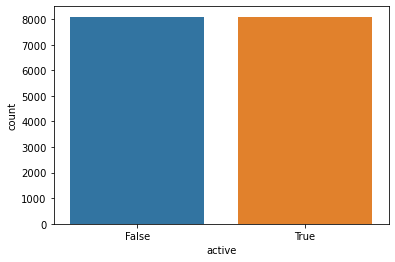

In [26]:
# balance data
US = RandomUnderSampler()
X_train_US,y_train_US = US.fit_resample(X_train_US,y_train_US)
sns.countplot(y_train_US)

In [27]:
def evaluation(md, X_train, X_test, y_train, y_test):
    
    md.fit(X_train_US, y_train_US)
    y_pred = md.predict(X_test)
    y_prob = md.predict_proba(X_test)
    
    md_features = md.feature_importances_
    #sd = np.std([feature.feature_importances_ for feature in md.estimators_], axis=0)
    importances = pd.Series(md_features, index=X_train_US.columns)
    #importances.plot.bar(yerr=sd)
    importances.plot.bar()


    print(classification_report(y_pred=y_pred, y_true=y_test))
    print(confusion_matrix(y_pred=y_pred, y_true=y_test))
    print('roc auc', roc_auc_score(y_true=y_test, y_score=y_prob[:,1]))


              precision    recall  f1-score   support

       False       0.53      0.76      0.62      3432
        True       0.89      0.74      0.81      9002

    accuracy                           0.75     12434
   macro avg       0.71      0.75      0.72     12434
weighted avg       0.79      0.75      0.76     12434

[[2599  833]
 [2312 6690]]
roc auc 0.8438752959067888


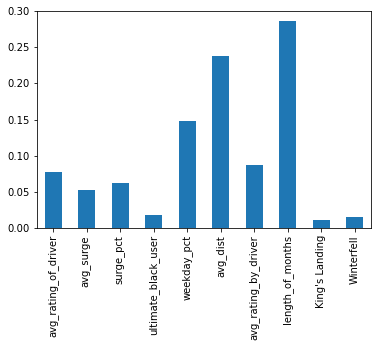

In [28]:
# Retension
# recall: predict not retension, but retension (false negative) -> fine...
# precision: predict retension, but not (false positive) -> waste resource


# Not Retension
# precision: predict not retension, but retension (false negative) -> fine...
# recall: predict retension, but not (false positive) -> waste resource

# positive/ nagative rate: tp/tp+fn fp/tn+fp

# optimise precision.

rfc = RandomForestClassifier()
evaluation(rfc, X_train_US, X_test, y_train_US, y_test)



              precision    recall  f1-score   support

       False       0.55      0.82      0.66      3432
        True       0.92      0.74      0.82      9002

    accuracy                           0.76     12434
   macro avg       0.73      0.78      0.74     12434
weighted avg       0.81      0.76      0.77     12434

[[2814  618]
 [2333 6669]]
roc auc 0.8631029416410443


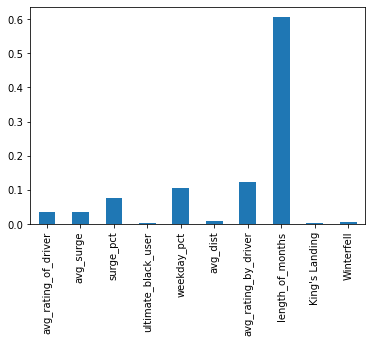

In [29]:
rfc2 = RandomForestClassifier(n_estimators=200, max_depth=5)
evaluation(rfc2, X_train_US, X_test, y_train_US, y_test)

              precision    recall  f1-score   support

       False       0.48      0.72      0.57      3432
        True       0.87      0.70      0.77      9002

    accuracy                           0.70     12434
   macro avg       0.67      0.71      0.67     12434
weighted avg       0.76      0.70      0.72     12434

[[2457  975]
 [2713 6289]]
roc auc 0.7073014304254585


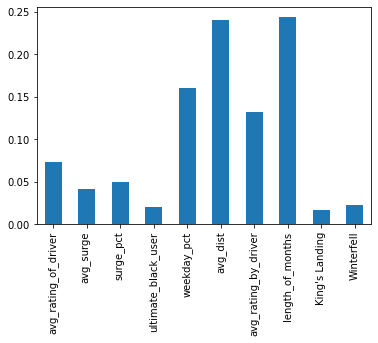

In [30]:
tree = DecisionTreeClassifier()
evaluation(tree, X_train_US, X_test, y_train_US, y_test)

In [31]:
# Shap waterfall plot
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

    return column_list, cum_sum, feature_ratio_order

In [32]:
# Shap waterfall plot
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

    return column_list, cum_sum, feature_ratio_order

In [38]:
rows = np.random.randint(0,len(X_train_US),100)

def shap_plot(md, X):
    shap.initjs()

    # Explain model predictions using shap library:
    explainer = shap.TreeExplainer(md) # must use trained model.
    shap_values = explainer.shap_values(X)
    
    # shap.summary_plot(shap_values[1],X, feature_names=X.columns)
    column_list, cum_sum, feature_ratio_order= make_shap_waterfall_plot(shap_values[1], pd.DataFrame(X, columns=X.columns))


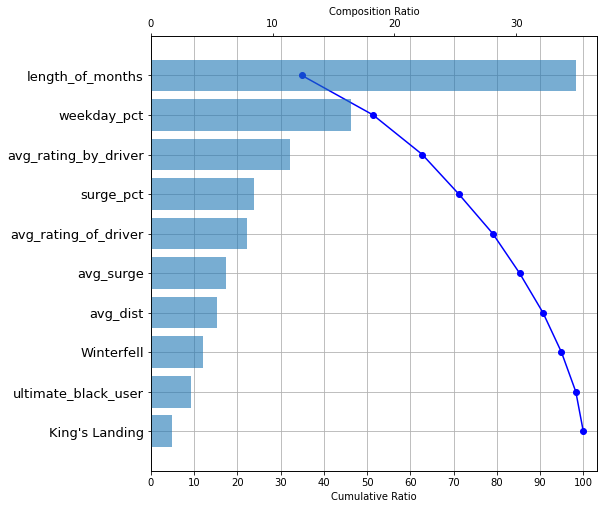

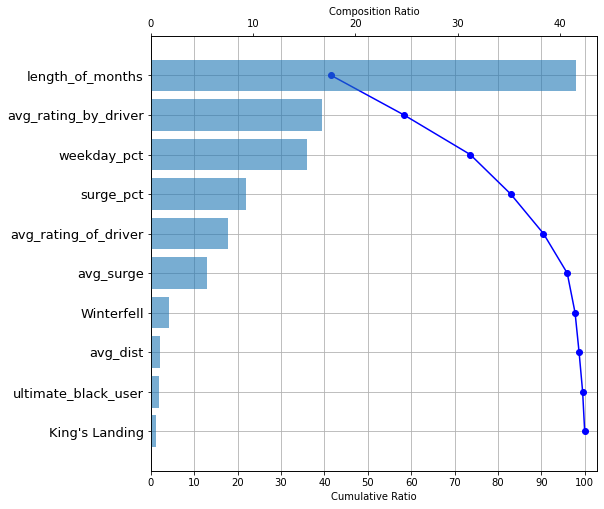

In [39]:
shap_plot(rfc, X_train_US.iloc[rows, :])
shap_plot(rfc2, X_train_US.iloc[rows, :])

Top features are weekday_pct, avg_dist, avg_rating_by_driver, length_of_months, avg_rating_of_driver